In [70]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.expected_conditions import *
import ddddocr

ocr = ddddocr.DdddOcr()

import time
import json
import os
import csv

欢迎使用ddddocr，本项目专注带动行业内卷，个人博客:wenanzhe.com
训练数据支持来源于:http://146.56.204.113:19199/preview
爬虫框架feapder可快速一键接入，快速开启爬虫之旅：https://github.com/Boris-code/feapder
谷歌reCaptcha验证码 / hCaptcha验证码 / funCaptcha验证码商业级识别接口：https://yescaptcha.com/i/NSwk7i


In [71]:
url = "http://10.113.178.219/"
#global driver

In [72]:
# selenium driver config
def open_driver(url):
    
    options = webdriver.ChromeOptions()
    options.add_experimental_option('excludeSwitches', ['enable-logging']) # for ignore warning and error
    options.add_experimental_option('detach', True)
    driver = webdriver.Chrome(options=options)
    driver.get(url)
    driver.implicitly_wait(5) # set a waiting time limit for the browser driver
    driver.maximize_window()
    return driver

### Task 0: Login

The first task is to complete the following code blocks to login our CDS Shop website using Selenium.
1. Go to login page
2. Keyin your account and password 
3. Press login button

In [73]:
def login(driver):
    account = 'mc45179'+'@um.edu.mo' # replace with your account
    password = 'mc45179' # replace with your password
    
    # complete the following script
    wait = WebDriverWait(driver,10)
    sign_in_page_button = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="basic-navbar-nav"]/div/a[2]')))
    sign_in_page_button.click()
    account_input = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="email"]')))
    account_input.send_keys(account)
    password_input = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="password"]')))
    password_input.send_keys(password)
    sign_in = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="root"]/main/div/div/div/div/form/button')))
    sign_in.click()        

In [74]:
def t0():
    #global driver
    driver = open_driver(url)
    login(driver)
    #driver.close()
    

driver = t0()

### Task 1: Place an order

This task requires you to place an order to purchase 5 units of the last product available on the CDS shop.

1. Go to last page
2. Find the last product
3. Set the quantity as 5
4. Press add to Cart
5. Proceed to check out
6. Fill shipping information (type anything in the postal address...)
7. Continue until you reach the payment page

In [75]:
def go_to_last_page(driver):
    # write your code here
    pages = driver.find_elements(By.CLASS_NAME,'page-item')
    #print(pages)
    #print(len(pages))
    last_page=pages[-1]
    #print(last_page.text)
    last_page.click()

   
    return driver

In [76]:
def place_an_order_on_last_product(driver):
    # Find the last product
    login(driver)
    go_to_last_page(driver)
    wait = WebDriverWait(driver, 10)
    card_bodys = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, "card-body")))
    product_link = card_bodys[-1].find_element(By.CSS_SELECTOR,'a')
    product_link.send_keys(Keys.CONTROL, Keys.RETURN)
    WebDriverWait(driver, 10).until(EC.number_of_windows_to_be(2))
    windows = driver.window_handles
    driver.switch_to.window(windows[-1])
    # Set the quantity as 5
    form5 = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//*[@id="root"]/main/div/div[1]/div[3]/div/div/div[3]/div/div[2]/select/option[5]')))
    #print(form5[0].text)
    form5[0].click()
    # Press add to Cart
    presstoadd = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div[1]/div[3]/div/div/div[4]/button')))
    presstoadd.click()
    # ...
    proceed = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div/div[2]/div/div/div[2]/button')))
    proceed.click()
    Address = driver.find_element(By.XPATH,'//*[@id="address"]')
    Address.send_keys("W31 University of Macau")
    City = driver.find_element(By.XPATH,'//*[@id="city"]')
    City.send_keys("Macau")
    PostalCode = driver.find_element(By.XPATH,'//*[@id="postalCode"]')
    PostalCode.send_keys("NA")
    Country = driver.find_element(By.XPATH,'//*[@id="country"]')
    Country.send_keys("China")
    Continue = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div/div/div/form/button')))
    Continue.click()
    Continue2 = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div/div/div/form/button')))
    Continue2.click()
    Place_Order = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div[2]/div[2]/div/div/div[7]/button')))
    Place_Order.click()
    # Continue until you reach the payment page
    
    # write your code here
    return driver


In [77]:
def t1():
    driver=open_driver(url)
    place_an_order_on_last_product(driver)
    #driver.close()

t1()   

### Task 2: Fetch the products with specific review rating

This task requires you to retrieve products with a review rating greater than or equal to 2.5.

1. Iterate all pages.
2. Open product page in new tab.
3. Find the review column.
4. Find the pattern of rating(empty filled, half filled, full filled).

In [78]:
def go_to_next_page(driver):
    # write your code here
    wait = WebDriverWait(driver, 10)
    pagination = wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'pagination')))
    pages = pagination.find_elements(By.TAG_NAME,'li')
    for i in range(len(pages)):
        class_name = pages[i].get_attribute('class')
        if class_name != 'page-item':
            break
    if i == len(pages)-1:
        # if the current page is the last page, there's no next_page
        return (False)

    try:
        next_page_link = pages[i+1]
        next_page_link.click()
    except:
        return False
    return driver

In [79]:
def get_review(driver):
    review = 0
    # write your code
    star_class=[]
    rating_element = driver.find_element(By.CLASS_NAME, "rating")
    star_elements = rating_element.find_elements(By.TAG_NAME, "i")
    for star in star_elements:
        star_class.append(star.get_attribute("class"))
    review = star_class.count("fas fa-star") + star_class.count("fas fa-star-half-alt")* 0.5
    #print(review)
    return review

In [80]:
def open_products_in_new_tag(driver):
    # write your code here 
    product_names = []
    card_bodys = driver.find_elements(By.CLASS_NAME, "card-body") # complete this line
    for card_body in card_bodys:
        product_link = card_body.find_element(By.CSS_SELECTOR,'a') # complete this line
        product_name = card_body.find_element(By.CLASS_NAME, "card-title").text # complete this line
        
        '''
            The following code is to open the product page in new tab
        '''
        
        if os.name == 'posix':
            # check Operation System, os.name =='posix' indicate the OS is Mac OS or linux
            product_link.send_keys(Keys.COMMAND, Keys.RETURN)
        else:
            product_link.send_keys(Keys.CONTROL, Keys.RETURN)
            
        WebDriverWait(driver, 5).until(EC.number_of_windows_to_be(2))
        windows = driver.window_handles
        # switch to handle the new window tab
        driver.switch_to.window(windows[-1])
        # compute the get_review function to extract the reviews
        review=get_review(driver)
        if review >= 2.5:
            product_names.append(product_name)
            #print(product_name)
        driver.close()
        driver.switch_to.window(windows[0])
    return(product_names)

In [81]:
def t2():
    product_names=[]
    driver = open_driver(url)
    while True:
        driver = go_to_next_page(driver)
        if (not driver): break
        product_names+=(open_products_in_new_tag(driver))
    print(product_names)
t2()

['3rd Generation red OPPO Watch Redmi Note headsets', 'Adidas Beauty Deluxe 10-Pack', 'AirTag', 'Anchor Monogram Asia Silver Metal Flower', 'Anchor Roman emperor Monogram Silver Metal Dog', 'Apple AirPods Max', 'Apple Books Deluxe Medium', 'Apple Home Entertainment Max 10-Pack', 'Apple Internation Version Redmi Note Pro 64GB', 'Apple MacBook Air 11 inches MD223LL/A 4GB RAM, 64GB HD, macOS 10.13', 'Apple Pencil 2nd Gen', 'Apple TV 4K', 'Apple Watch Series 5', 'Apple Watch Series 8', 'Art Silver Metal - Sealing Wax Europe', 'Art Style Dog Pear Anchor', 'Asia Used wonderful United States Silver Metal', 'Butterfly Wood WorldWide Asia Monogram', 'Cannon EOS 80D DSLR Camera', 'Chanel Furniture Lite Bundle', 'Dell Home Entertainment Exclusive 128GB', 'Dell Smart Home Lite Bundle', 'Dell Sports Exclusive Bundle', 'Dell Toys Edition Medium', 'Dell Toys Max XL', 'Echo 3rd Generation Redmi Note 64GB Silver', 'Echo purple Amazon 64GB 128GB', 'Europe Asia Anchor Wood Sealing Wax', 'Europe wonderful

### Task 3: Purchase the 10 most expensive products.
This task entails adding the 10 most expensive products to the cart in a **single order** and proceeding with the payment.

To proceed with the payment, you are required to pass a **captcha code test** using the ["ddddocr"](https://github.com/sml2h3/ddddocr) library.

1. Empty the carts
2. Get the names of the 10 most expensive products.
3. Add them into cart by searching products name.
4. Place the order when all the products are in the carts.
5. Proceed the payment.

In [82]:
def empty_carts(driver):
    # write your code
    wait = WebDriverWait(driver, 10)
    #login(driver)
    cartbutton=wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="basic-navbar-nav"]/div/a')))
    #print(cartbutton)
    cartbutton.click()
    cart = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="root"]/main/div/div/div[1]/div')))
    if cart.text == 'Your cart is empty Go Back':
        print('Cart is empty')
        return driver
    cartitems = cart.find_elements(By.CLASS_NAME,"list-group-item")
    #print(cartitems)
    for ele in cartitems:
        button = ele.find_element(By.TAG_NAME,"button")
        button.click()
    print('Cart emptied')
    return driver

In [83]:
def fetch_top10_names(driver):
    # write your code
    temp = {}
    itembuffer = []
    order_list=[]
    i=0
    wait = WebDriverWait(driver,10)
    Shop=wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="root"]/header/nav/div/a')))
    Shop.click()
    while True:
        cardbodys = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"card-body")))
        for cardbody in cardbodys:
            name = cardbody.find_elements(By.CSS_SELECTOR,'a')
            price = cardbody.find_element(By.CSS_SELECTOR,'h3')
            #print(name[0].text)
            #print(price.text)
            temp["name"]=name[0].text
            temp["price"]=float(price.text[1:])
            #print(temp)
            itembuffer.append(temp.copy())
        driver = go_to_next_page(driver)
        i+=1
        if (not driver): break
            #print(itembuffer)
    sorted_items=(sorted(itembuffer, key = lambda i: i['price']) )
    print(sorted_items)
    top10_items=sorted_items[-10:]

    for ele in top10_items:
        order_list.append(ele['name'])
    print(str(i)+" pages searched "+str(len(sorted_items))+" products included")
    return order_list

In [84]:
def place_products_orders(driver,names):
    # write your code here
    wait=WebDriverWait(driver,10)
    for ele in names:
        top_bar = wait.until(EC.presence_of_all_elements_located((By.ID,"basic-navbar-nav")))
        search_bar = top_bar[0].find_elements(By.NAME,"q")
        search_button = top_bar[0].find_elements(By.TAG_NAME,"button")
        #print(search_bar)
        search_bar[0].clear()
        search_bar[0].send_keys(ele)
        #print(search_button)
        search_button[0].click()
        card_bodys = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, "card-body")))
        product_link = card_bodys[-1].find_element(By.CSS_SELECTOR,'a')
        product_link.send_keys(Keys.RETURN)
        #WebDriverWait(driver, 10).until(EC.number_of_windows_to_be(2))
        #windows = driver.window_handles
        #driver.switch_to.window(windows[-1])
        status = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div[1]/div[3]/div/div/div[2]/div/div[2]')))
        if status.text == 'In Stock':
            presstoadd = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//*[@id="root"]/main/div/div[1]/div[3]/div/div/div[4]/button')))
            presstoadd[0].click()
        else:
            pass

    return 0

In [85]:
def pay_for_order(driver):
    # write your code here
    wait = WebDriverWait(driver,1)
    proceed = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div/div[2]/div/div/div[2]/button')))
    proceed.click()
    Address = driver.find_element(By.XPATH,'//*[@id="address"]')
    Address.clear()
    Address.send_keys("W31 University of Macau")
    City = driver.find_element(By.XPATH,'//*[@id="city"]')
    City.clear()
    City.send_keys("Macau")
    PostalCode = driver.find_element(By.XPATH,'//*[@id="postalCode"]')
    PostalCode.clear()
    PostalCode.send_keys("NA")
    Country = driver.find_element(By.XPATH,'//*[@id="country"]')
    Country.clear()
    Country.send_keys("China")
    Continue = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div/div/div/form/button')))
    Continue.click()
    Continue2 = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div/div/div/form/button')))
    Continue2.click()
    Place_Order = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div[2]/div[2]/div/div/div[7]/button')))
    Place_Order.click()
    #time.sleep(2)
    captcha_canvas = driver.find_element(By.ID, "canv")
    captcha_canvas.screenshot('./captcha_image.png')
    image = open("captcha_image.png", "rb").read()
    result = ocr.classification(image)
    captcha_iput = driver.find_element(By.XPATH,'//*[@id="user_captcha_input"]')
    captcha_iput.send_keys(result)
    submit_button = driver.find_element(By.XPATH,'//*[@id="root"]/main/div/div/div[2]/div/div/div[6]/div/div/div/div[3]/div/button')
    submit_button.click()
    return 0

In [86]:
def t3():
    global driver
    driver = open_driver(url)
    login(driver)
    empty_carts(driver)
    top10_items=fetch_top10_names(driver)
    print(top10_items)
    #print(top10_items)
    place_products_orders(driver,top10_items)
    pay_for_order(driver)
    print('Products Paid, Order Completed')
    
t3()

Cart is empty
[{'name': '256GB Pro 5G purple Internation Version', 'price': 5.99}, {'name': 'Huawei Home Entertainment Ultra XXL', 'price': 11.56}, {'name': 'Asia Used wonderful United States Silver Metal', 'price': 20.99}, {'name': 'Apple Home Entertainment Max 10-Pack', 'price': 23.42}, {'name': 'AirTag', 'price': 29.99}, {'name': 'Amazon Echo Dot 3rd Generation', 'price': 29.99}, {'name': 'Style Pear Dog Butterfly -', 'price': 29.99}, {'name': 'HP Sports Ultra 10-Pack', 'price': 44.27}, {'name': 'Gold 2nd Generation Internation Version 128GB Redmi Note', 'price': 48.99}, {'name': 'Logitech G-Series Gaming Mouse', 'price': 49.99}, {'name': 'Dog Letters Monogram Anchor United States', 'price': 51.99}, {'name': 'Italian Letters Dog Butterfly Silver Metal', 'price': 52.99}, {'name': '3rd Generation 5G 64GB Plus accessories', 'price': 56.99}, {'name': '3rd Generation red OPPO Watch Redmi Note headsets', 'price': 59.99}, {'name': 'Anchor Monogram Asia Silver Metal Flower', 'price': 60.99}

In [87]:
# #reserved for test, not for assignment
# driver=open_driver(url)
# wait=WebDriverWait(driver,10)
# login(driver)
# names=["Levi's Computers Deluxe 10-Pack", "L'Oreal Home Entertainment Exclusive Medium", "L'Oreal Electronics Ultra Medium", 'Huawei MateStation X', 'Logitech Wearables Max XXL', 'Adidas Beauty Deluxe 10-Pack', 'Dell Home Entertainment Exclusive 128GB', 'Mac Studio', 'Pro Display XDR', 'Mac Pro']

# #names=['Huawei MateBook 14s', 'Montblanc Summit 3', 'Huawei MateBook X Pro', 'Studio Display', 'Huawei MateStation X', 'Mac Studio', 'TAG Heuer Connected Calibre E4', 'Pro Display XDR', 'Mac Pro']
# place_products_orders(driver,names)
# proceed = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div/div[2]/div/div/div[2]/button')))
# proceed.click()
# Address = driver.find_element(By.XPATH,'//*[@id="address"]')
# Address.send_keys("W31 University of Macau")
# City = driver.find_element(By.XPATH,'//*[@id="city"]')
# City.send_keys("Macau")
# PostalCode = driver.find_element(By.XPATH,'//*[@id="postalCode"]')
# PostalCode.send_keys("NA")
# Country = driver.find_element(By.XPATH,'//*[@id="country"]')
# Country.send_keys("China")
# Continue = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div/div/div/form/button')))
# Continue.click()
# Continue2 = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div/div/div/form/button')))
# Continue2.click()
# Place_Order = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div[2]/div[2]/div/div/div[7]/button')))
# Place_Order.click()
# #time.sleep(2)
# captcha_canvas = driver.find_element(By.ID, "canv")
# captcha_canvas.screenshot('./captcha_image.png')
# image = open("captcha_image.png", "rb").read()
# result = ocr.classification(image)
# captcha_iput = driver.find_element(By.XPATH,'//*[@id="user_captcha_input"]')
# captcha_iput.send_keys(result)
# submit_button = driver.find_element(By.XPATH,'//*[@id="root"]/main/div/div/div[2]/div/div/div[6]/div/div/div/div[3]/div/button')
# submit_button.click()

---


### Task 4: Flash sale (bonus)

This task is time-limited, and only the first few orders will secure the products for you. We count the time based on the payment time rather than the order time. We will randomly reduce prices for select items in a period of time. We will anounce you the time slot in class. Your task is to identify these discounted products, place the order, and complete the payment. Successful purchases will be marked as delivered, as shown in the image.


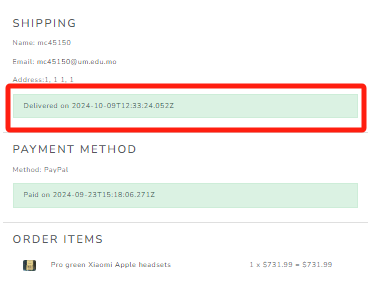

1. You are expected to crawl and store the names and prices of all products in advance.
2. There will be 4 rounds for the flash sale, with the quota decreasing as each round progresses.
3. Only an order with completed payment and each order containing only one product will be considered a valid order.
4. Submit your purchasing code in the following code block. 


In [88]:
original_list=[{'name': '256GB Pro 5G purple Internation Version', 'price': 5.99}, {'name': 'Huawei Home Entertainment Ultra XXL', 'price': 11.56}, {'name': 'Asia Used wonderful United States Silver Metal', 'price': 20.99}, {'name': 'Apple Home Entertainment Max 10-Pack', 'price': 23.42}, {'name': 'AirTag', 'price': 29.99}, {'name': 'Amazon Echo Dot 3rd Generation', 'price': 29.99}, {'name': 'Style Pear Dog Butterfly -', 'price': 29.99}, {'name': 'HP Sports Ultra 10-Pack', 'price': 44.27}, {'name': 'Gold 2nd Generation Internation Version 128GB Redmi Note', 'price': 48.99}, {'name': 'Logitech G-Series Gaming Mouse', 'price': 49.99}, {'name': 'Dog Letters Monogram Anchor United States', 'price': 51.99}, {'name': 'Italian Letters Dog Butterfly Silver Metal', 'price': 52.99}, {'name': '3rd Generation 5G 64GB Plus accessories', 'price': 56.99}, {'name': '3rd Generation red OPPO Watch Redmi Note headsets', 'price': 59.99}, {'name': 'Anchor Monogram Asia Silver Metal Flower', 'price': 60.99}, {'name': '- 19th centery Flower Art Roman emperor', 'price': 66.99}, {'name': 'OPPO BDP-103 Universal Disc Player SACD / DVD-Audio / 3D Blu-ray', 'price': 66.99}, {'name': 'Apple Internation Version Redmi Note Pro 64GB', 'price': 70.99}, {'name': 'Butterfly Wood WorldWide Asia Monogram', 'price': 70.99}, {'name': 'Echo purple Amazon 64GB 128GB', 'price': 83.99}, {'name': 'Airpods Wireless Bluetooth Headphones', 'price': 89.99}, {'name': 'HomePod mini', 'price': 99.99}, {'name': 'Huawei FreeBuds 5i', 'price': 99.99}, {'name': 'Huawei WiFi AX3', 'price': 99.99}, {'name': 'MagSafe Battery Pack', 'price': 99.99}, {'name': 'Huawei Audio Ultra Small', 'price': 103.07}, {'name': 'Nike Kitchen Ultra 128GB', 'price': 106.17}, {'name': 'United States Anchor Pear Silver Metal -', 'price': 109.99}, {'name': 'Echo Internation Version Gold 64GB purple', 'price': 116.99}, {'name': 'Samsung Electronics Exclusive Bundle', 'price': 121.34}, {'name': 'Apple Pencil 2nd Gen', 'price': 129.99}, {'name': 'Huawei FreeBuds Lipstick', 'price': 129.99}, {'name': 'Magic Trackpad 2', 'price': 129.99}, {'name': 'Samsung Fashion Exclusive XXL', 'price': 135.7}, {'name': 'Internation Version 256GB Smart Watches purple 2nd Generation', 'price': 139.99}, {'name': 'Roman emperor wonderful Monogram Anchor Used', 'price': 142.99}, {'name': 'Huawei WiFi AX6 Pro', 'price': 149.99}, {'name': 'Silver red Apple Amazon Internation Version', 'price': 164.99}, {'name': '256GB 5G Redmi Note red 2nd Generation', 'price': 170.99}, {'name': 'Pro cell Phones smartphones Echo purple OPPO Watch', 'price': 172.99}, {'name': 'Lenovo Fashion Deluxe 128GB', 'price': 174.27}, {'name': '64GB 3rd Generation cell Phones smartphones Internation Version Plus', 'price': 174.99}, {'name': 'Apple TV 4K', 'price': 179.99}, {'name': "L'Oreal Wearables Edition XXL", 'price': 187.14}, {'name': 'Redmi Note 2nd Generation green headsets 3rd Generation', 'price': 191.99}, {'name': 'H_M Home Entertainment Ultra Large', 'price': 193.19}, {'name': 'Huawei FreeBuds Pro 2', 'price': 199.99}, {'name': 'Huawei Watch GT 3 SE', 'price': 199.99}, {'name': 'Magic Keyboard with Numeric Keypad', 'price': 199.99}, {'name': 'Smart Keyboard Folio for iPad Air 5th Gen', 'price': 199.99}, {'name': 'Panasonic Sports Edition 10-Pack', 'price': 212.03}, {'name': 'Echo 3rd Generation Redmi Note 64GB Silver', 'price': 228.99}, {'name': 'WorldWide Italian Wax Stamp - Vintage', 'price': 235.99}, {'name': '2nd Generation 64GB red OPPO Watch 3rd Generation', 'price': 245.99}, {'name': 'Apple Watch Series 5', 'price': 249.99}, {'name': 'Huawei FreeBuds Pro', 'price': 249.99}, {'name': 'Huawei Watch GT Runner', 'price': 249.99}, {'name': 'Europe wonderful Vintage Pear Italian', 'price': 262.99}, {'name': 'Apple MacBook Air 11 inches MD223LL/A 4GB RAM, 64GB HD, macOS 10.13', 'price': 269.0}, {'name': "Levi's Audio Deluxe XXL", 'price': 278.02}, {'name': 'Oppo A74 Dual-SIM 128GB ROM 6GB RAM GSM Only | No CDMA', 'price': 284.99}, {'name': 'Lenovo Electronics Ultra Large', 'price': 285.46}, {'name': 'Gucci Sports Edition XXL', 'price': 286.32}, {'name': 'WorldWide Sealing Wax Letters 19th centery -', 'price': 288.99}, {'name': 'accessories 5G Xiaomi cell Phones_smartphones Silver', 'price': 288.99}, {'name': 'Oppo Wearables Edition XL', 'price': 292.05}, {'name': 'Samsung Toys Ultra Bundle', 'price': 296.73}, {'name': 'Apple Pencil 2nd Generation', 'price': 296.99}, {'name': "Levi's Kitchen Max Small", 'price': 296.99}, {'name': 'Huawei MatePad SE 10.4', 'price': 299.99}, {'name': 'Huawei Watch GT 3 Elegant', 'price': 299.99}, {'name': 'Huawei WiFi Mesh 3', 'price': 299.99}, {'name': 'Anchor Roman emperor Monogram Silver Metal Dog', 'price': 316.99}, {'name': 'Art Style Dog Pear Anchor', 'price': 319.99}, {'name': 'Style WorldWide wonderful Silver Metal 19th centery', 'price': 326.99}, {'name': 'Monogram Italian Handle Wax Stamp Chinese', 'price': 333.99}, {'name': 'Ikea Outdoors Deluxe 256GB', 'price': 334.96}, {'name': 'United States Letters Handle Europe Sealing Wax', 'price': 341.99}, {'name': '128GB OPPO Watch Plus 5G Pro', 'price': 343.99}, {'name': 'Redmi Note Internation Version headsets 128GB Amazon', 'price': 347.99}, {'name': 'Huawei Watch GT 3 Pro', 'price': 349.99}, {'name': 'Magic Keyboard for iPad Pro 12.9-inch', 'price': 349.99}, {'name': "Levi's Accessories Exclusive XXL", 'price': 367.67}, {'name': 'Vintage Used United States - Sealing Wax', 'price': 368.99}, {'name': 'Roman emperor Chinese Vintage Monogram Europe', 'price': 369.99}, {'name': 'Italian - Handle Monogram Europe', 'price': 372.99}, {'name': 'Monogram Vintage - Roman emperor Used', 'price': 380.99}, {'name': 'Flower Italian Asia Style Monogram', 'price': 392.99}, {'name': 'purple 256GB red Smart Watches Redmi Note', 'price': 394.99}, {'name': 'Apple Watch Series 8', 'price': 399.99}, {'name': 'Huawei Nova 9 SE', 'price': 399.99}, {'name': 'Huawei Sound X', 'price': 399.99}, {'name': 'Sony Playstation 4 Pro White Version', 'price': 399.99}, {'name': 'Xiaomi red Smart Watches Amazon 5G', 'price': 399.99}, {'name': 'Smart Watches headsets Pro green 2nd Generation', 'price': 409.99}, {'name': 'Chanel Beauty Edition Large', 'price': 420.67}, {'name': 'Europe Wood Art United States Italian', 'price': 423.99}, {'name': 'Dell Smart Home Lite Bundle', 'price': 437.76}, {'name': 'United States Sealing Wax 19th centery Dog Art', 'price': 440.99}, {'name': 'Nike Outdoors Edition 256GB', 'price': 441.73}, {'name': 'Huawei Watch GT 3 Pro Ceramic', 'price': 449.99}, {'name': 'Plus 3rd Generation Amazon OPPO Watch Xiaomi', 'price': 451.99}, {'name': 'Plus purple OPPO Watch Redmi Note Silver', 'price': 457.99}, {'name': 'Ikea Beauty Deluxe 10-Pack', 'price': 471.89}, {'name': 'Chanel Electronics Deluxe 10-Pack', 'price': 480.79}, {'name': 'Samsung Smart Home Exclusive 256GB', 'price': 488.73}, {'name': '3rd Generation Gold 128GB cell Phones_smartphones Apple', 'price': 493.99}, {'name': 'Huawei MateBook D 14', 'price': 499.99}, {'name': 'Huawei WiFi Mesh 7', 'price': 499.99}, {'name': 'Butterfly WorldWide Anchor Style Vintage', 'price': 501.99}, {'name': 'Xiaomi 256GB Gold Plus Redmi Note', 'price': 503.99}, {'name': 'Art Silver Metal - Sealing Wax Europe', 'price': 505.99}, {'name': 'Dell Beauty Pro XL', 'price': 507.96}, {'name': '19th centery Style Wax Stamp Used Butterfly', 'price': 521.99}, {'name': 'Panasonic Audio Pro XXL', 'price': 525.98}, {'name': 'wonderful Roman emperor Europe Letters Wax Stamp', 'price': 528.99}, {'name': 'Silver Metal Wax Stamp Letters Dog WorldWide', 'price': 531.99}, {'name': 'Used wonderful Roman emperor Vintage -', 'price': 538.99}, {'name': 'Huawei Computers Pro Large', 'price': 547.45}, {'name': 'Apple AirPods Max', 'price': 549.99}, {'name': 'Microsoft Kitchen Edition Large', 'price': 550.06}, {'name': '- Art Asia Roman emperor Used', 'price': 552.99}, {'name': 'Redmi Note 128GB Apple red accessories', 'price': 558.99}, {'name': 'Europe Asia Anchor Wood Sealing Wax', 'price': 559.99}, {'name': 'Ikea Computers Pro 256GB', 'price': 560.08}, {'name': '2021 Apple TV 4K 32GB', 'price': 570.99}, {'name': 'Smart Watches Xiaomi 64GB purple 3rd Generation', 'price': 574.99}, {'name': 'Dell Toys Edition Medium', 'price': 583.98}, {'name': 'Wood Monogram Flower Art Sealing Wax', 'price': 593.99}, {'name': 'Supershieldz Designed for Samsung Galaxy S20 FE 5G', 'price': 598.99}, {'name': 'Huawei Nova 11 Pro', 'price': 599.99}, {'name': 'Huawei P40 Pro', 'price': 599.99}, {'name': 'iPad Air 5th Gen', 'price': 599.99}, {'name': 'iPhone 11 Pro 256GB Memory', 'price': 599.99}, {'name': 'Roman emperor Wood Style Butterfly Silver Metal', 'price': 602.99}, {'name': 'WorldWide French wonderful Rose Sealing Wax', 'price': 612.99}, {'name': '3rd Generation 2nd Generation red headsets Gold', 'price': 623.99}, {'name': 'Silver Metal Handle - Pear Wax Stamp', 'price': 635.99}, {'name': "Levi's Books Ultra 256GB", 'price': 636.21}, {'name': 'Logitech Toys Lite Small', 'price': 658.47}, {'name': 'Chinese Anchor Italian Sealing Wax Asia', 'price': 658.99}, {'name': 'Apple 256GB Redmi Note 64GB Plus', 'price': 660.99}, {'name': 'Redmi Note Amazon 5G purple 64GB', 'price': 664.99}, {'name': 'Oppo Computers Max XL', 'price': 665.47}, {'name': 'Microsoft Outdoors Pro XXL', 'price': 677.1}, {'name': "Levi's Computers Ultra Small", 'price': 679.05}, {'name': 'Huawei MateBook D 15', 'price': 699.99}, {'name': 'Huawei MateStation S', 'price': 699.99}, {'name': 'Mac mini', 'price': 699.99}, {'name': 'Jitterbug Flip2 Cell Phone for Seniors Red', 'price': 701.99}, {'name': 'Silver Redmi Note Internation Version accessories 3rd Generation', 'price': 714.99}, {'name': 'Pear Roman emperor French Handle Letters', 'price': 719.99}, {'name': 'Zara Computers Edition Large', 'price': 720.0}, {'name': 'Plus 128GB Echo Amazon Smart Watches', 'price': 720.99}, {'name': '5G 3rd Generation 2nd Generation cell Phones_smartphones Internation Version', 'price': 723.99}, {'name': 'Pro green Xiaomi Apple headsets', 'price': 731.99}, {'name': 'Roman emperor Chinese Style Used Wood', 'price': 733.99}, {'name': 'Microsoft Furniture Edition 10-Pack', 'price': 776.64}, {'name': 'Gucci Electronics Exclusive XL', 'price': 797.84}, {'name': "L'Oreal Audio Edition XL", 'price': 799.87}, {'name': 'Huawei MatePad Pro 12.6', 'price': 799.99}, {'name': 'Huawei P50 Pro', 'price': 799.99}, {'name': 'Plus accessories green OPPO Watch Amazon', 'price': 799.99}, {'name': 'Huawei Accessories Edition 256GB', 'price': 817.34}, {'name': 'Nike Toys Pro 10-Pack', 'price': 827.42}, {'name': 'Butterfly Sealing Wax Dog Asia Europe', 'price': 829.99}, {'name': 'Microsoft Home Entertainment Deluxe Bundle', 'price': 857.34}, {'name': 'Samsung Home Entertainment Exclusive XL', 'price': 859.38}, {'name': 'Dell Outdoors Exclusive 256GB', 'price': 859.64}, {'name': 'Italian Wood Used Letters wonderful', 'price': 868.99}, {'name': 'Pro cell Phones_smartphones green accessories purple', 'price': 870.99}, {'name': 'French Asia Chinese wonderful Dog', 'price': 880.99}, {'name': 'HP Sports Deluxe 10-Pack', 'price': 883.95}, {'name': 'Flower Wood Asia Europe Art', 'price': 889.99}, {'name': 'Microsoft Electronics Pro 128GB', 'price': 892.62}, {'name': 'Anchor Europe WorldWide Butterfly Silver Metal', 'price': 895.99}, {'name': '- WorldWide Roman emperor Wax Stamp Vintage', 'price': 903.99}, {'name': 'Nike Audio Deluxe XXL', 'price': 907.56}, {'name': 'Gold Redmi Note Pro Silver Amazon', 'price': 913.99}, {'name': 'Lenovo Home Entertainment Edition Large', 'price': 920.44}, {'name': 'Italian Wax Stamp WorldWide Rose Used', 'price': 927.99}, {'name': 'Cannon EOS 80D DSLR Camera', 'price': 929.99}, {'name': 'Pear Style Wax Stamp Anchor Roman emperor', 'price': 929.99}, {'name': 'Panasonic Furniture Max 10-Pack', 'price': 931.93}, {'name': 'Logitech Wearables Deluxe Small', 'price': 937.78}, {'name': 'Echo Apple Amazon Plus 5G', 'price': 940.99}, {'name': 'Samsung Outdoors Lite Small', 'price': 947.52}, {'name': 'Microsoft Wearables Lite 10-Pack', 'price': 952.04}, {'name': 'Smart Watches headsets Redmi Note green Amazon', 'price': 959.99}, {'name': 'wonderful - Asia Roman emperor WorldWide', 'price': 961.99}, {'name': 'Gold Amazon OPPO Watch Plus headsets', 'price': 969.99}, {'name': 'Asia Roman emperor Art Anchor Handle', 'price': 976.99}, {'name': 'Microsoft Books Exclusive 10-Pack', 'price': 979.77}, {'name': 'Flower Asia Wood Anchor Italian', 'price': 995.99}, {'name': 'Huawei Mate 60 Pro', 'price': 999.99}, {'name': 'Huawei MateBook 13s', 'price': 999.99}, {'name': 'Huawei MateBook E', 'price': 999.99}, {'name': 'MacBook Air M2', 'price': 999.99}, {'name': 'HP Outdoors Max 10-Pack', 'price': 1015.21}, {'name': 'Samsung Computers Lite Large', 'price': 1024.15}, {'name': "L'Oreal Outdoors Max 256GB", 'price': 1032.85}, {'name': 'H_M Fashion Ultra Medium', 'price': 1071.13}, {'name': 'H_M Outdoors Ultra 10-Pack', 'price': 1082.14}, {'name': 'Huawei Accessories Lite XXL', 'price': 1091.39}, {'name': 'iPhone 14 Pro Max', 'price': 1099.99}, {'name': 'Panasonic Computers Lite XL', 'price': 1171.92}, {'name': 'Huawei P60 Pro', 'price': 1199.99}, {'name': 'Dell Fashion Max 256GB', 'price': 1205.96}, {'name': 'Apple Books Deluxe Medium', 'price': 1224.65}, {'name': 'Microsoft Home Entertainment Lite Bundle', 'price': 1228.5}, {'name': 'HP Furniture Edition 128GB', 'price': 1230.26}, {'name': 'Chanel Fashion Ultra 10-Pack', 'price': 1259.96}, {'name': 'Sony Smart Home Deluxe Small', 'price': 1270.81}, {'name': "L'Oreal Wearables Max Bundle", 'price': 1276.04}, {'name': 'H_M Computers Lite 10-Pack', 'price': 1285.35}, {'name': 'Huawei MateBook 14s', 'price': 1299.99}, {'name': 'iMac 24-inch', 'price': 1299.99}, {'name': 'Huawei Computers Exclusive Medium', 'price': 1334.18}, {'name': 'Microsoft Home Entertainment Max XL', 'price': 1365.35}, {'name': 'Sony Fashion Max 10-Pack', 'price': 1395.03}, {'name': 'Adidas Audio Lite Medium', 'price': 1404.71}, {'name': 'Nike Toys Lite Large', 'price': 1419.0}, {'name': 'Ikea Electronics Exclusive 10-Pack', 'price': 1425.33}, {'name': "Levi's Home Entertainment Max XXL", 'price': 1445.24}, {'name': 'Microsoft Home Entertainment Pro Bundle', 'price': 1457.04}, {'name': 'Dell Toys Max XL', 'price': 1458.11}, {'name': 'Dell Sports Exclusive Bundle', 'price': 1498.59}, {'name': 'Huawei MateBook X Pro', 'price': 1499.99}, {'name': 'Dell Fashion Lite Small', 'price': 1504.47}, {'name': 'Logitech Accessories Pro Small', 'price': 1540.35}, {'name': 'Oppo Audio Edition XL', 'price': 1548.21}, {'name': 'Nike Beauty Edition Large', 'price': 1550.95}, {'name': "L'Oreal Wearables Lite XL", 'price': 1567.42}, {'name': 'Studio Display', 'price': 1599.99}, {'name': 'Sony Wearables Deluxe XXL', 'price': 1610.52}, {'name': 'Logitech Kitchen Lite Medium', 'price': 1615.96}, {'name': 'Huawei Kitchen Ultra XL', 'price': 1659.69}, {'name': 'Zara Home Entertainment Pro XL', 'price': 1660.41}, {'name': 'Chanel Furniture Lite Bundle', 'price': 1662.76}, {'name': "L'Oreal Toys Ultra Large", 'price': 1674.11}, {'name': 'Oppo Electronics Lite 128GB', 'price': 1680.78}, {'name': 'Samsung Outdoors Edition XL', 'price': 1696.61}, {'name': 'Nike Accessories Max 256GB', 'price': 1719.11}, {'name': 'H_M Wearables Deluxe 256GB', 'price': 1730.73}, {'name': "Levi's Computers Deluxe 10-Pack", 'price': 1742.54}, {'name': "L'Oreal Home Entertainment Exclusive Medium", 'price': 1855.53}, {'name': "L'Oreal Electronics Ultra Medium", 'price': 1883.25}, {'name': 'Huawei MateStation X', 'price': 1899.99}, {'name': 'Logitech Wearables Max XXL', 'price': 1954.25}, {'name': 'Adidas Beauty Deluxe 10-Pack', 'price': 1984.24}, {'name': 'Dell Home Entertainment Exclusive 128GB', 'price': 1988.21}, {'name': 'Mac Studio', 'price': 1999.99}, {'name': 'Pro Display XDR', 'price': 4999.99}, {'name': 'Mac Pro', 'price': 5999.99}]



In [89]:
def fetch_all_names_and_price_4(driver):
    # write your code
    #driver.get(url)
    temp = {}
    itembuffer = []
    #order_list=[]
    wait = WebDriverWait(driver,10)
    cardbodys = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"card-body")))
    for cardbody in cardbodys:
        name = cardbody.find_elements(By.CSS_SELECTOR,'a')
        price = cardbody.find_element(By.CSS_SELECTOR,'h3')
        #print(name[0].text)
        #print(price.text)
        temp["name"]=name[0].text
        temp["price"]=float(price.text[1:])
        #print(temp)
        itembuffer.append(temp.copy())
        #print(itembuffer)
            #print(itembuffer)
    #sorted_items=(sorted(itembuffer, key = lambda i: i['price']) )
    #top10_items=sorted_items[-10:]
    

    return  itembuffer

In [90]:
def search_dicts_by_key_value_4(dict_list1,dict_list2):
    result = []
    for ele1 in dict_list1:
        for ele2 in dict_list2:
            if ele1['name'] == ele2['name'] and ele1['price']>ele2['price']:
                result.append(ele2['name'])       
    return result
   

In [91]:
def place_products_orders_4(driver,names):
    # write your code here
    wait=WebDriverWait(driver,10)
    #print(names)
    one_name=names[0]#purchase only one if more than one products discounted in one page
    added=[]
    #for ele in one_name:
    top_bar = wait.until(EC.presence_of_all_elements_located((By.ID,"basic-navbar-nav")))
    search_bar = top_bar[0].find_elements(By.NAME,"q")
    search_button = top_bar[0].find_elements(By.TAG_NAME,"button")
    #print(search_bar)
    search_bar[0].clear()
    search_bar[0].send_keys(one_name)
    #print(search_button)
    search_button[0].click()
    card_bodys = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, "card-body")))
    product_link = card_bodys[-1].find_element(By.CSS_SELECTOR,'a')
    product_link.send_keys(Keys.RETURN)
    #WebDriverWait(driver, 10).until(EC.number_of_windows_to_be(2))
    #windows = driver.window_handles
    #driver.switch_to.window(windows[-1])
    status = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div[1]/div[3]/div/div/div[2]/div/div[2]')))
    
    if status.text == 'In Stock':
        presstoadd = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//*[@id="root"]/main/div/div[1]/div[3]/div/div/div[4]/button')))
        presstoadd[0].click()
        added.append(one_name)
    else:
        pass
    
    if len(added)>0:
        return 1
    else:
        return 0

  

In [92]:
def go_to_next_page_loop(driver):
    # write your code here
    wait = WebDriverWait(driver, 10)
    pagination = wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'pagination')))
    pages = pagination.find_elements(By.TAG_NAME,'li')
    for i in range(len(pages)):
        class_name = pages[i].get_attribute('class')
        if class_name != 'page-item':
            break
    if i == len(pages)-1:
        # if the current page is the last page, there's no next_page
        CDS_SHOP=wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/header/nav/div/a')))
        CDS_SHOP.click()

    try:
        next_page_link = pages[i+1]
        next_page_link.click()
    except:
        CDS_SHOP=wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/header/nav/div/a')))
        CDS_SHOP.click()
    return driver

In [93]:
def pay_for_order_4(driver):
    # write your code here
    wait = WebDriverWait(driver,1)
    proceed = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div/div[2]/div/div/div[2]/button')))
    proceed.click()
    Address = driver.find_element(By.XPATH,'//*[@id="address"]')
    Address.clear()
    Address.send_keys("W31 University of Macau")
    City = driver.find_element(By.XPATH,'//*[@id="city"]')
    City.clear()
    City.send_keys("Macau")
    PostalCode = driver.find_element(By.XPATH,'//*[@id="postalCode"]')
    PostalCode.clear()
    PostalCode.send_keys("NA")
    Country = driver.find_element(By.XPATH,'//*[@id="country"]')
    Country.clear()
    Country.send_keys("China")
    Continue = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div/div/div/form/button')))
    Continue.click()
    Continue2 = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div/div/div/form/button')))
    Continue2.click()
    Place_Order = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/main/div/div[2]/div[2]/div/div/div[7]/button')))
    Place_Order.click()
    #time.sleep(2)
    captcha_canvas = driver.find_element(By.ID, "canv")
    captcha_canvas.screenshot('./captcha_image.png')
    image = open("captcha_image.png", "rb").read()
    result = ocr.classification(image)
    captcha_iput = driver.find_element(By.XPATH,'//*[@id="user_captcha_input"]')
    captcha_iput.send_keys(result)
    submit_button = driver.find_element(By.XPATH,'//*[@id="root"]/main/div/div/div[2]/div/div/div[6]/div/div/div/div[3]/div/button')
    submit_button.click()
    return 0

In [ ]:
def t4():
    global driver
    windows_number=1
    driver = open_driver(url)
    wait=WebDriverWait(driver,10)
    login(driver)
    #time.sleep(0.1)
    #empty_carts(driver)
    while True:
        new_list=fetch_all_names_and_price_4(driver)
        #print(new_list)
        #print(len(new_list))
        purchase_targets=search_dicts_by_key_value_4(original_list,new_list)
        #print(puchase_targets)
        if (len(purchase_targets)>0):
            CDS_SHOP1=wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="root"]/header/nav/div/a')))
            if os.name == 'posix':
            # check Operation System, os.name =='posix' indicate the OS is Mac OS or linux
                CDS_SHOP1.send_keys(Keys.COMMAND, Keys.RETURN)
            else:
                CDS_SHOP1.send_keys(Keys.CONTROL, Keys.RETURN)
            windows_number+=1
            WebDriverWait(driver, 5).until(EC.number_of_windows_to_be(windows_number))
            windows = driver.window_handles
            # switch to handle the new window tab
            driver.switch_to.window(windows[-1])
            result=place_products_orders_4(driver,purchase_targets)
            #print(result)
            if result == 1:
                pay_for_order_4(driver)
                print('Purchased '+purchase_targets[0])
                #driver.close()                         
                #driver.switch_to.window(windows[0])
                #purchase_targets.clear()
                #driver=go_to_next_page_loop(driver)
                break
            else:
                driver.close()
                windows_number-=1
                driver.switch_to.window(windows[0])
                purchase_targets.clear()
                driver=go_to_next_page_loop(driver)
        else:
            driver=go_to_next_page_loop(driver)
            
    print('Complete')
    
    return 

t4()

In [ ]:
original_list=[{'name': '256GB Pro 5G purple Internation Version', 'price': 5.99}, {'name': 'Huawei Home Entertainment Ultra XXL', 'price': 11.56}, {'name': 'Asia Used wonderful United States Silver Metal', 'price': 20.99}, {'name': 'Apple Home Entertainment Max 10-Pack', 'price': 23.42}, {'name': 'AirTag', 'price': 29.99}, {'name': 'Amazon Echo Dot 3rd Generation', 'price': 29.99}, {'name': 'Style Pear Dog Butterfly -', 'price': 29.99}, {'name': 'HP Sports Ultra 10-Pack', 'price': 44.27}, {'name': 'Gold 2nd Generation Internation Version 128GB Redmi Note', 'price': 48.99}, {'name': 'Logitech G-Series Gaming Mouse', 'price': 49.99}, {'name': 'Dog Letters Monogram Anchor United States', 'price': 51.99}, {'name': 'Italian Letters Dog Butterfly Silver Metal', 'price': 52.99}, {'name': '3rd Generation 5G 64GB Plus accessories', 'price': 56.99}, {'name': '3rd Generation red OPPO Watch Redmi Note headsets', 'price': 59.99}, {'name': 'Anchor Monogram Asia Silver Metal Flower', 'price': 60.99}, {'name': '- 19th centery Flower Art Roman emperor', 'price': 66.99}, {'name': 'OPPO BDP-103 Universal Disc Player SACD / DVD-Audio / 3D Blu-ray', 'price': 66.99}, {'name': 'Apple Internation Version Redmi Note Pro 64GB', 'price': 70.99}, {'name': 'Butterfly Wood WorldWide Asia Monogram', 'price': 70.99}, {'name': 'Echo purple Amazon 64GB 128GB', 'price': 83.99}, {'name': 'Airpods Wireless Bluetooth Headphones', 'price': 89.99}, {'name': 'HomePod mini', 'price': 99.99}, {'name': 'Huawei FreeBuds 5i', 'price': 99.99}, {'name': 'Huawei WiFi AX3', 'price': 99.99}, {'name': 'MagSafe Battery Pack', 'price': 99.99}, {'name': 'Huawei Audio Ultra Small', 'price': 103.07}, {'name': 'Nike Kitchen Ultra 128GB', 'price': 106.17}, {'name': 'United States Anchor Pear Silver Metal -', 'price': 109.99}, {'name': 'Echo Internation Version Gold 64GB purple', 'price': 116.99}, {'name': 'Samsung Electronics Exclusive Bundle', 'price': 121.34}, {'name': 'Apple Pencil 2nd Gen', 'price': 129.99}, {'name': 'Huawei FreeBuds Lipstick', 'price': 129.99}, {'name': 'Magic Trackpad 2', 'price': 129.99}, {'name': 'Samsung Fashion Exclusive XXL', 'price': 135.7}, {'name': 'Internation Version 256GB Smart Watches purple 2nd Generation', 'price': 139.99}, {'name': 'Roman emperor wonderful Monogram Anchor Used', 'price': 142.99}, {'name': 'Huawei WiFi AX6 Pro', 'price': 149.99}, {'name': 'Silver red Apple Amazon Internation Version', 'price': 164.99}, {'name': '256GB 5G Redmi Note red 2nd Generation', 'price': 170.99}, {'name': 'Pro cell Phones smartphones Echo purple OPPO Watch', 'price': 172.99}, {'name': 'Lenovo Fashion Deluxe 128GB', 'price': 174.27}, {'name': '64GB 3rd Generation cell Phones smartphones Internation Version Plus', 'price': 174.99}, {'name': 'Apple TV 4K', 'price': 179.99}, {'name': "L'Oreal Wearables Edition XXL", 'price': 187.14}, {'name': 'Redmi Note 2nd Generation green headsets 3rd Generation', 'price': 191.99}, {'name': 'H_M Home Entertainment Ultra Large', 'price': 193.19}, {'name': 'Huawei FreeBuds Pro 2', 'price': 199.99}, {'name': 'Huawei Watch GT 3 SE', 'price': 199.99}, {'name': 'Magic Keyboard with Numeric Keypad', 'price': 199.99}, {'name': 'Smart Keyboard Folio for iPad Air 5th Gen', 'price': 199.99}, {'name': 'Panasonic Sports Edition 10-Pack', 'price': 212.03}, {'name': 'Echo 3rd Generation Redmi Note 64GB Silver', 'price': 228.99}, {'name': 'WorldWide Italian Wax Stamp - Vintage', 'price': 235.99}, {'name': '2nd Generation 64GB red OPPO Watch 3rd Generation', 'price': 245.99}, {'name': 'Apple Watch Series 5', 'price': 249.99}, {'name': 'Huawei FreeBuds Pro', 'price': 249.99}, {'name': 'Huawei Watch GT Runner', 'price': 249.99}, {'name': 'Europe wonderful Vintage Pear Italian', 'price': 262.99}, {'name': 'Apple MacBook Air 11 inches MD223LL/A 4GB RAM, 64GB HD, macOS 10.13', 'price': 269.0}, {'name': "Levi's Audio Deluxe XXL", 'price': 278.02}, {'name': 'Oppo A74 Dual-SIM 128GB ROM 6GB RAM GSM Only | No CDMA', 'price': 284.99}, {'name': 'Lenovo Electronics Ultra Large', 'price': 285.46}, {'name': 'Gucci Sports Edition XXL', 'price': 286.32}, {'name': 'WorldWide Sealing Wax Letters 19th centery -', 'price': 288.99}, {'name': 'accessories 5G Xiaomi cell Phones_smartphones Silver', 'price': 288.99}, {'name': 'Oppo Wearables Edition XL', 'price': 292.05}, {'name': 'Samsung Toys Ultra Bundle', 'price': 296.73}, {'name': 'Apple Pencil 2nd Generation', 'price': 296.99}, {'name': "Levi's Kitchen Max Small", 'price': 296.99}, {'name': 'Huawei MatePad SE 10.4', 'price': 299.99}, {'name': 'Huawei Watch GT 3 Elegant', 'price': 299.99}, {'name': 'Huawei WiFi Mesh 3', 'price': 299.99}, {'name': 'Anchor Roman emperor Monogram Silver Metal Dog', 'price': 316.99}, {'name': 'Art Style Dog Pear Anchor', 'price': 319.99}, {'name': 'Style WorldWide wonderful Silver Metal 19th centery', 'price': 326.99}, {'name': 'Monogram Italian Handle Wax Stamp Chinese', 'price': 333.99}, {'name': 'Ikea Outdoors Deluxe 256GB', 'price': 334.96}, {'name': 'United States Letters Handle Europe Sealing Wax', 'price': 341.99}, {'name': '128GB OPPO Watch Plus 5G Pro', 'price': 343.99}, {'name': 'Redmi Note Internation Version headsets 128GB Amazon', 'price': 347.99}, {'name': 'Huawei Watch GT 3 Pro', 'price': 349.99}, {'name': 'Magic Keyboard for iPad Pro 12.9-inch', 'price': 349.99}, {'name': "Levi's Accessories Exclusive XXL", 'price': 367.67}, {'name': 'Vintage Used United States - Sealing Wax', 'price': 368.99}, {'name': 'Roman emperor Chinese Vintage Monogram Europe', 'price': 369.99}, {'name': 'Italian - Handle Monogram Europe', 'price': 372.99}, {'name': 'Monogram Vintage - Roman emperor Used', 'price': 380.99}, {'name': 'Flower Italian Asia Style Monogram', 'price': 392.99}, {'name': 'purple 256GB red Smart Watches Redmi Note', 'price': 394.99}, {'name': 'Apple Watch Series 8', 'price': 399.99}, {'name': 'Huawei Nova 9 SE', 'price': 399.99}, {'name': 'Huawei Sound X', 'price': 399.99}, {'name': 'Sony Playstation 4 Pro White Version', 'price': 399.99}, {'name': 'Xiaomi red Smart Watches Amazon 5G', 'price': 399.99}, {'name': 'Smart Watches headsets Pro green 2nd Generation', 'price': 409.99}, {'name': 'Chanel Beauty Edition Large', 'price': 420.67}, {'name': 'Europe Wood Art United States Italian', 'price': 423.99}, {'name': 'Dell Smart Home Lite Bundle', 'price': 437.76}, {'name': 'United States Sealing Wax 19th centery Dog Art', 'price': 440.99}, {'name': 'Nike Outdoors Edition 256GB', 'price': 441.73}, {'name': 'Huawei Watch GT 3 Pro Ceramic', 'price': 449.99}, {'name': 'Plus 3rd Generation Amazon OPPO Watch Xiaomi', 'price': 451.99}, {'name': 'Plus purple OPPO Watch Redmi Note Silver', 'price': 457.99}, {'name': 'Ikea Beauty Deluxe 10-Pack', 'price': 471.89}, {'name': 'Chanel Electronics Deluxe 10-Pack', 'price': 480.79}, {'name': 'Samsung Smart Home Exclusive 256GB', 'price': 488.73}, {'name': '3rd Generation Gold 128GB cell Phones_smartphones Apple', 'price': 493.99}, {'name': 'Huawei MateBook D 14', 'price': 499.99}, {'name': 'Huawei WiFi Mesh 7', 'price': 499.99}, {'name': 'Butterfly WorldWide Anchor Style Vintage', 'price': 501.99}, {'name': 'Xiaomi 256GB Gold Plus Redmi Note', 'price': 503.99}, {'name': 'Art Silver Metal - Sealing Wax Europe', 'price': 505.99}, {'name': 'Dell Beauty Pro XL', 'price': 507.96}, {'name': '19th centery Style Wax Stamp Used Butterfly', 'price': 521.99}, {'name': 'Panasonic Audio Pro XXL', 'price': 525.98}, {'name': 'wonderful Roman emperor Europe Letters Wax Stamp', 'price': 528.99}, {'name': 'Silver Metal Wax Stamp Letters Dog WorldWide', 'price': 531.99}, {'name': 'Used wonderful Roman emperor Vintage -', 'price': 538.99}, {'name': 'Huawei Computers Pro Large', 'price': 547.45}, {'name': 'Apple AirPods Max', 'price': 549.99}, {'name': 'Microsoft Kitchen Edition Large', 'price': 550.06}, {'name': '- Art Asia Roman emperor Used', 'price': 552.99}, {'name': 'Redmi Note 128GB Apple red accessories', 'price': 558.99}, {'name': 'Europe Asia Anchor Wood Sealing Wax', 'price': 559.99}, {'name': 'Ikea Computers Pro 256GB', 'price': 560.08}, {'name': '2021 Apple TV 4K 32GB', 'price': 570.99}, {'name': 'Smart Watches Xiaomi 64GB purple 3rd Generation', 'price': 574.99}, {'name': 'Dell Toys Edition Medium', 'price': 583.98}, {'name': 'Wood Monogram Flower Art Sealing Wax', 'price': 593.99}, {'name': 'Supershieldz Designed for Samsung Galaxy S20 FE 5G', 'price': 598.99}, {'name': 'Huawei Nova 11 Pro', 'price': 599.99}, {'name': 'Huawei P40 Pro', 'price': 599.99}, {'name': 'iPad Air 5th Gen', 'price': 599.99}, {'name': 'iPhone 11 Pro 256GB Memory', 'price': 599.99}, {'name': 'Roman emperor Wood Style Butterfly Silver Metal', 'price': 602.99}, {'name': 'WorldWide French wonderful Rose Sealing Wax', 'price': 612.99}, {'name': '3rd Generation 2nd Generation red headsets Gold', 'price': 623.99}, {'name': 'Silver Metal Handle - Pear Wax Stamp', 'price': 635.99}, {'name': "Levi's Books Ultra 256GB", 'price': 636.21}, {'name': 'Logitech Toys Lite Small', 'price': 658.47}, {'name': 'Chinese Anchor Italian Sealing Wax Asia', 'price': 658.99}, {'name': 'Apple 256GB Redmi Note 64GB Plus', 'price': 660.99}, {'name': 'Redmi Note Amazon 5G purple 64GB', 'price': 664.99}, {'name': 'Oppo Computers Max XL', 'price': 665.47}, {'name': 'Microsoft Outdoors Pro XXL', 'price': 677.1}, {'name': "Levi's Computers Ultra Small", 'price': 679.05}, {'name': 'Huawei MateBook D 15', 'price': 699.99}, {'name': 'Huawei MateStation S', 'price': 699.99}, {'name': 'Mac mini', 'price': 699.99}, {'name': 'Jitterbug Flip2 Cell Phone for Seniors Red', 'price': 701.99}, {'name': 'Silver Redmi Note Internation Version accessories 3rd Generation', 'price': 714.99}, {'name': 'Pear Roman emperor French Handle Letters', 'price': 719.99}, {'name': 'Zara Computers Edition Large', 'price': 720.0}, {'name': 'Plus 128GB Echo Amazon Smart Watches', 'price': 720.99}, {'name': '5G 3rd Generation 2nd Generation cell Phones_smartphones Internation Version', 'price': 723.99}, {'name': 'Pro green Xiaomi Apple headsets', 'price': 731.99}, {'name': 'Roman emperor Chinese Style Used Wood', 'price': 733.99}, {'name': 'Microsoft Furniture Edition 10-Pack', 'price': 776.64}, {'name': 'Gucci Electronics Exclusive XL', 'price': 797.84}, {'name': "L'Oreal Audio Edition XL", 'price': 799.87}, {'name': 'Huawei MatePad Pro 12.6', 'price': 799.99}, {'name': 'Huawei P50 Pro', 'price': 799.99}, {'name': 'Plus accessories green OPPO Watch Amazon', 'price': 799.99}, {'name': 'Huawei Accessories Edition 256GB', 'price': 817.34}, {'name': 'Nike Toys Pro 10-Pack', 'price': 827.42}, {'name': 'Butterfly Sealing Wax Dog Asia Europe', 'price': 829.99}, {'name': 'Microsoft Home Entertainment Deluxe Bundle', 'price': 857.34}, {'name': 'Samsung Home Entertainment Exclusive XL', 'price': 859.38}, {'name': 'Dell Outdoors Exclusive 256GB', 'price': 859.64}, {'name': 'Italian Wood Used Letters wonderful', 'price': 868.99}, {'name': 'Pro cell Phones_smartphones green accessories purple', 'price': 870.99}, {'name': 'French Asia Chinese wonderful Dog', 'price': 880.99}, {'name': 'HP Sports Deluxe 10-Pack', 'price': 883.95}, {'name': 'Flower Wood Asia Europe Art', 'price': 889.99}, {'name': 'Microsoft Electronics Pro 128GB', 'price': 892.62}, {'name': 'Anchor Europe WorldWide Butterfly Silver Metal', 'price': 895.99}, {'name': '- WorldWide Roman emperor Wax Stamp Vintage', 'price': 903.99}, {'name': 'Nike Audio Deluxe XXL', 'price': 907.56}, {'name': 'Gold Redmi Note Pro Silver Amazon', 'price': 913.99}, {'name': 'Lenovo Home Entertainment Edition Large', 'price': 920.44}, {'name': 'Italian Wax Stamp WorldWide Rose Used', 'price': 927.99}, {'name': 'Cannon EOS 80D DSLR Camera', 'price': 929.99}, {'name': 'Pear Style Wax Stamp Anchor Roman emperor', 'price': 929.99}, {'name': 'Panasonic Furniture Max 10-Pack', 'price': 931.93}, {'name': 'Logitech Wearables Deluxe Small', 'price': 937.78}, {'name': 'Echo Apple Amazon Plus 5G', 'price': 940.99}, {'name': 'Samsung Outdoors Lite Small', 'price': 947.52}, {'name': 'Microsoft Wearables Lite 10-Pack', 'price': 952.04}, {'name': 'Smart Watches headsets Redmi Note green Amazon', 'price': 959.99}, {'name': 'wonderful - Asia Roman emperor WorldWide', 'price': 961.99}, {'name': 'Gold Amazon OPPO Watch Plus headsets', 'price': 969.99}, {'name': 'Asia Roman emperor Art Anchor Handle', 'price': 976.99}, {'name': 'Microsoft Books Exclusive 10-Pack', 'price': 979.77}, {'name': 'Flower Asia Wood Anchor Italian', 'price': 995.99}, {'name': 'Huawei Mate 60 Pro', 'price': 999.99}, {'name': 'Huawei MateBook 13s', 'price': 999.99}, {'name': 'Huawei MateBook E', 'price': 999.99}, {'name': 'MacBook Air M2', 'price': 999.99}, {'name': 'HP Outdoors Max 10-Pack', 'price': 1015.21}, {'name': 'Samsung Computers Lite Large', 'price': 1024.15}, {'name': "L'Oreal Outdoors Max 256GB", 'price': 1032.85}, {'name': 'H_M Fashion Ultra Medium', 'price': 1071.13}, {'name': 'H_M Outdoors Ultra 10-Pack', 'price': 1082.14}, {'name': 'Huawei Accessories Lite XXL', 'price': 1091.39}, {'name': 'iPhone 14 Pro Max', 'price': 1099.99}, {'name': 'Panasonic Computers Lite XL', 'price': 1171.92}, {'name': 'Huawei P60 Pro', 'price': 1199.99}, {'name': 'Dell Fashion Max 256GB', 'price': 1205.96}, {'name': 'Apple Books Deluxe Medium', 'price': 1224.65}, {'name': 'Microsoft Home Entertainment Lite Bundle', 'price': 1228.5}, {'name': 'HP Furniture Edition 128GB', 'price': 1230.26}, {'name': 'Chanel Fashion Ultra 10-Pack', 'price': 1259.96}, {'name': 'Sony Smart Home Deluxe Small', 'price': 1270.81}, {'name': "L'Oreal Wearables Max Bundle", 'price': 1276.04}, {'name': 'H_M Computers Lite 10-Pack', 'price': 1285.35}, {'name': 'Huawei MateBook 14s', 'price': 1299.99}, {'name': 'iMac 24-inch', 'price': 1299.99}, {'name': 'Huawei Computers Exclusive Medium', 'price': 1334.18}, {'name': 'Microsoft Home Entertainment Max XL', 'price': 1365.35}, {'name': 'Sony Fashion Max 10-Pack', 'price': 1395.03}, {'name': 'Adidas Audio Lite Medium', 'price': 1404.71}, {'name': 'Nike Toys Lite Large', 'price': 1419.0}, {'name': 'Ikea Electronics Exclusive 10-Pack', 'price': 1425.33}, {'name': "Levi's Home Entertainment Max XXL", 'price': 1445.24}, {'name': 'Microsoft Home Entertainment Pro Bundle', 'price': 1457.04}, {'name': 'Dell Toys Max XL', 'price': 1458.11}, {'name': 'Dell Sports Exclusive Bundle', 'price': 1498.59}, {'name': 'Huawei MateBook X Pro', 'price': 1499.99}, {'name': 'Dell Fashion Lite Small', 'price': 1504.47}, {'name': 'Logitech Accessories Pro Small', 'price': 1540.35}, {'name': 'Oppo Audio Edition XL', 'price': 1548.21}, {'name': 'Nike Beauty Edition Large', 'price': 1550.95}, {'name': "L'Oreal Wearables Lite XL", 'price': 1567.42}, {'name': 'Studio Display', 'price': 1599.99}, {'name': 'Sony Wearables Deluxe XXL', 'price': 1610.52}, {'name': 'Logitech Kitchen Lite Medium', 'price': 1615.96}, {'name': 'Huawei Kitchen Ultra XL', 'price': 1659.69}, {'name': 'Zara Home Entertainment Pro XL', 'price': 1660.41}, {'name': 'Chanel Furniture Lite Bundle', 'price': 1662.76}, {'name': "L'Oreal Toys Ultra Large", 'price': 1674.11}, {'name': 'Oppo Electronics Lite 128GB', 'price': 1680.78}, {'name': 'Samsung Outdoors Edition XL', 'price': 1696.61}, {'name': 'Nike Accessories Max 256GB', 'price': 1719.11}, {'name': 'H_M Wearables Deluxe 256GB', 'price': 1730.73}, {'name': "Levi's Computers Deluxe 10-Pack", 'price': 1742.54}, {'name': "L'Oreal Home Entertainment Exclusive Medium", 'price': 1855.53}, {'name': "L'Oreal Electronics Ultra Medium", 'price': 1883.25}, {'name': 'Huawei MateStation X', 'price': 1899.99}, {'name': 'Logitech Wearables Max XXL', 'price': 1954.25}, {'name': 'Adidas Beauty Deluxe 10-Pack', 'price': 1984.24}, {'name': 'Dell Home Entertainment Exclusive 128GB', 'price': 1988.21}, {'name': 'Mac Studio', 'price': 1999.99}, {'name': 'Pro Display XDR', 'price': 4999.99}, {'name': 'Mac Pro', 'price': 5999.99}]



In [ ]:
original_list=[{'name': '256GB Pro 5G purple Internation Version', 'price': 5.99}, {'name': 'Huawei Home Entertainment Ultra XXL', 'price': 11.56}, {'name': 'Asia Used wonderful United States Silver Metal', 'price': 20.99}, {'name': 'Apple Home Entertainment Max 10-Pack', 'price': 23.42}, {'name': 'AirTag', 'price': 29.99}, {'name': 'Amazon Echo Dot 3rd Generation', 'price': 29.99}, {'name': 'Style Pear Dog Butterfly -', 'price': 29.99}, {'name': 'HP Sports Ultra 10-Pack', 'price': 44.27}, {'name': 'Gold 2nd Generation Internation Version 128GB Redmi Note', 'price': 48.99}, {'name': 'Logitech G-Series Gaming Mouse', 'price': 49.99}, {'name': 'Dog Letters Monogram Anchor United States', 'price': 51.99}, {'name': 'Italian Letters Dog Butterfly Silver Metal', 'price': 52.99}, {'name': '3rd Generation 5G 64GB Plus accessories', 'price': 56.99}, {'name': '3rd Generation red OPPO Watch Redmi Note headsets', 'price': 59.99}, {'name': 'Anchor Monogram Asia Silver Metal Flower', 'price': 60.99}, {'name': '- 19th centery Flower Art Roman emperor', 'price': 66.99}, {'name': 'OPPO BDP-103 Universal Disc Player SACD / DVD-Audio / 3D Blu-ray', 'price': 66.99}, {'name': 'Apple Internation Version Redmi Note Pro 64GB', 'price': 70.99}, {'name': 'Butterfly Wood WorldWide Asia Monogram', 'price': 70.99}, {'name': 'Echo purple Amazon 64GB 128GB', 'price': 83.99}, {'name': 'Airpods Wireless Bluetooth Headphones', 'price': 89.99}, {'name': 'HomePod mini', 'price': 99.99}, {'name': 'Huawei FreeBuds 5i', 'price': 99.99}, {'name': 'Huawei WiFi AX3', 'price': 99.99}, {'name': 'MagSafe Battery Pack', 'price': 99.99}, {'name': 'Huawei Audio Ultra Small', 'price': 103.07}, {'name': 'Nike Kitchen Ultra 128GB', 'price': 106.17}, {'name': 'United States Anchor Pear Silver Metal -', 'price': 109.99}, {'name': 'Echo Internation Version Gold 64GB purple', 'price': 116.99}, {'name': 'Samsung Electronics Exclusive Bundle', 'price': 121.34}, {'name': 'Apple Pencil 2nd Gen', 'price': 129.99}, {'name': 'Huawei FreeBuds Lipstick', 'price': 129.99}, {'name': 'Magic Trackpad 2', 'price': 129.99}, {'name': 'Samsung Fashion Exclusive XXL', 'price': 135.7}, {'name': 'Internation Version 256GB Smart Watches purple 2nd Generation', 'price': 139.99}, {'name': 'Roman emperor wonderful Monogram Anchor Used', 'price': 142.99}, {'name': 'Huawei WiFi AX6 Pro', 'price': 149.99}, {'name': 'Silver red Apple Amazon Internation Version', 'price': 164.99}, {'name': '256GB 5G Redmi Note red 2nd Generation', 'price': 170.99}, {'name': 'Pro cell Phones smartphones Echo purple OPPO Watch', 'price': 172.99}, {'name': 'Lenovo Fashion Deluxe 128GB', 'price': 174.27}, {'name': '64GB 3rd Generation cell Phones smartphones Internation Version Plus', 'price': 174.99}, {'name': 'Apple TV 4K', 'price': 179.99}, {'name': "L'Oreal Wearables Edition XXL", 'price': 187.14}, {'name': 'Redmi Note 2nd Generation green headsets 3rd Generation', 'price': 191.99}, {'name': 'H_M Home Entertainment Ultra Large', 'price': 193.19}, {'name': 'Huawei FreeBuds Pro 2', 'price': 199.99}, {'name': 'Huawei Watch GT 3 SE', 'price': 199.99}, {'name': 'Magic Keyboard with Numeric Keypad', 'price': 199.99}, {'name': 'Smart Keyboard Folio for iPad Air 5th Gen', 'price': 199.99}, {'name': 'Panasonic Sports Edition 10-Pack', 'price': 212.03}, {'name': 'Echo 3rd Generation Redmi Note 64GB Silver', 'price': 228.99}, {'name': 'WorldWide Italian Wax Stamp - Vintage', 'price': 235.99}, {'name': '2nd Generation 64GB red OPPO Watch 3rd Generation', 'price': 245.99}, {'name': 'Apple Watch Series 5', 'price': 249.99}, {'name': 'Huawei FreeBuds Pro', 'price': 249.99}, {'name': 'Huawei Watch GT Runner', 'price': 249.99}, {'name': 'Europe wonderful Vintage Pear Italian', 'price': 262.99}, {'name': 'Apple MacBook Air 11 inches MD223LL/A 4GB RAM, 64GB HD, macOS 10.13', 'price': 269.0}, {'name': "Levi's Audio Deluxe XXL", 'price': 278.02}, {'name': 'Oppo A74 Dual-SIM 128GB ROM 6GB RAM GSM Only | No CDMA', 'price': 284.99}, {'name': 'Lenovo Electronics Ultra Large', 'price': 285.46}, {'name': 'Gucci Sports Edition XXL', 'price': 286.32}, {'name': 'WorldWide Sealing Wax Letters 19th centery -', 'price': 288.99}, {'name': 'accessories 5G Xiaomi cell Phones_smartphones Silver', 'price': 288.99}, {'name': 'Oppo Wearables Edition XL', 'price': 292.05}, {'name': 'Samsung Toys Ultra Bundle', 'price': 296.73}, {'name': 'Apple Pencil 2nd Generation', 'price': 296.99}, {'name': "Levi's Kitchen Max Small", 'price': 296.99}, {'name': 'Huawei MatePad SE 10.4', 'price': 299.99}, {'name': 'Huawei Watch GT 3 Elegant', 'price': 299.99}, {'name': 'Huawei WiFi Mesh 3', 'price': 299.99}, {'name': 'Anchor Roman emperor Monogram Silver Metal Dog', 'price': 316.99}, {'name': 'Art Style Dog Pear Anchor', 'price': 319.99}, {'name': 'Style WorldWide wonderful Silver Metal 19th centery', 'price': 326.99}, {'name': 'Monogram Italian Handle Wax Stamp Chinese', 'price': 333.99}, {'name': 'Ikea Outdoors Deluxe 256GB', 'price': 334.96}, {'name': 'United States Letters Handle Europe Sealing Wax', 'price': 341.99}, {'name': '128GB OPPO Watch Plus 5G Pro', 'price': 343.99}, {'name': 'Redmi Note Internation Version headsets 128GB Amazon', 'price': 347.99}, {'name': 'Huawei Watch GT 3 Pro', 'price': 349.99}, {'name': 'Magic Keyboard for iPad Pro 12.9-inch', 'price': 349.99}, {'name': "Levi's Accessories Exclusive XXL", 'price': 367.67}, {'name': 'Vintage Used United States - Sealing Wax', 'price': 368.99}, {'name': 'Roman emperor Chinese Vintage Monogram Europe', 'price': 369.99}, {'name': 'Italian - Handle Monogram Europe', 'price': 372.99}, {'name': 'Monogram Vintage - Roman emperor Used', 'price': 380.99}, {'name': 'Flower Italian Asia Style Monogram', 'price': 392.99}, {'name': 'purple 256GB red Smart Watches Redmi Note', 'price': 394.99}, {'name': 'Apple Watch Series 8', 'price': 399.99}, {'name': 'Huawei Nova 9 SE', 'price': 399.99}, {'name': 'Huawei Sound X', 'price': 399.99}, {'name': 'Sony Playstation 4 Pro White Version', 'price': 399.99}, {'name': 'Xiaomi red Smart Watches Amazon 5G', 'price': 399.99}, {'name': 'Smart Watches headsets Pro green 2nd Generation', 'price': 409.99}, {'name': 'Chanel Beauty Edition Large', 'price': 420.67}, {'name': 'Europe Wood Art United States Italian', 'price': 423.99}, {'name': 'Dell Smart Home Lite Bundle', 'price': 437.76}, {'name': 'United States Sealing Wax 19th centery Dog Art', 'price': 440.99}, {'name': 'Nike Outdoors Edition 256GB', 'price': 441.73}, {'name': 'Huawei Watch GT 3 Pro Ceramic', 'price': 449.99}, {'name': 'Plus 3rd Generation Amazon OPPO Watch Xiaomi', 'price': 451.99}, {'name': 'Plus purple OPPO Watch Redmi Note Silver', 'price': 457.99}, {'name': 'Ikea Beauty Deluxe 10-Pack', 'price': 471.89}, {'name': 'Chanel Electronics Deluxe 10-Pack', 'price': 480.79}, {'name': 'Samsung Smart Home Exclusive 256GB', 'price': 488.73}, {'name': '3rd Generation Gold 128GB cell Phones_smartphones Apple', 'price': 493.99}, {'name': 'Huawei MateBook D 14', 'price': 499.99}, {'name': 'Huawei WiFi Mesh 7', 'price': 499.99}, {'name': 'Butterfly WorldWide Anchor Style Vintage', 'price': 501.99}, {'name': 'Xiaomi 256GB Gold Plus Redmi Note', 'price': 503.99}, {'name': 'Art Silver Metal - Sealing Wax Europe', 'price': 505.99}, {'name': 'Dell Beauty Pro XL', 'price': 507.96}, {'name': '19th centery Style Wax Stamp Used Butterfly', 'price': 521.99}, {'name': 'Panasonic Audio Pro XXL', 'price': 525.98}, {'name': 'wonderful Roman emperor Europe Letters Wax Stamp', 'price': 528.99}, {'name': 'Silver Metal Wax Stamp Letters Dog WorldWide', 'price': 531.99}, {'name': 'Used wonderful Roman emperor Vintage -', 'price': 538.99}, {'name': 'Huawei Computers Pro Large', 'price': 547.45}, {'name': 'Apple AirPods Max', 'price': 549.99}, {'name': 'Microsoft Kitchen Edition Large', 'price': 550.06}, {'name': '- Art Asia Roman emperor Used', 'price': 552.99}, {'name': 'Redmi Note 128GB Apple red accessories', 'price': 558.99}, {'name': 'Europe Asia Anchor Wood Sealing Wax', 'price': 559.99}, {'name': 'Ikea Computers Pro 256GB', 'price': 560.08}, {'name': '2021 Apple TV 4K 32GB', 'price': 570.99}, {'name': 'Smart Watches Xiaomi 64GB purple 3rd Generation', 'price': 574.99}, {'name': 'Dell Toys Edition Medium', 'price': 583.98}, {'name': 'Wood Monogram Flower Art Sealing Wax', 'price': 593.99}, {'name': 'Supershieldz Designed for Samsung Galaxy S20 FE 5G', 'price': 598.99}, {'name': 'Huawei Nova 11 Pro', 'price': 599.99}, {'name': 'Huawei P40 Pro', 'price': 599.99}, {'name': 'iPad Air 5th Gen', 'price': 599.99}, {'name': 'iPhone 11 Pro 256GB Memory', 'price': 599.99}, {'name': 'Roman emperor Wood Style Butterfly Silver Metal', 'price': 602.99}, {'name': 'WorldWide French wonderful Rose Sealing Wax', 'price': 612.99}, {'name': '3rd Generation 2nd Generation red headsets Gold', 'price': 623.99}, {'name': 'Silver Metal Handle - Pear Wax Stamp', 'price': 635.99}, {'name': "Levi's Books Ultra 256GB", 'price': 636.21}, {'name': 'Logitech Toys Lite Small', 'price': 658.47}, {'name': 'Chinese Anchor Italian Sealing Wax Asia', 'price': 658.99}, {'name': 'Apple 256GB Redmi Note 64GB Plus', 'price': 660.99}, {'name': 'Redmi Note Amazon 5G purple 64GB', 'price': 664.99}, {'name': 'Oppo Computers Max XL', 'price': 665.47}, {'name': 'Microsoft Outdoors Pro XXL', 'price': 677.1}, {'name': "Levi's Computers Ultra Small", 'price': 679.05}, {'name': 'Huawei MateBook D 15', 'price': 699.99}, {'name': 'Huawei MateStation S', 'price': 699.99}, {'name': 'Mac mini', 'price': 699.99}, {'name': 'Jitterbug Flip2 Cell Phone for Seniors Red', 'price': 701.99}, {'name': 'Silver Redmi Note Internation Version accessories 3rd Generation', 'price': 714.99}, {'name': 'Pear Roman emperor French Handle Letters', 'price': 719.99}, {'name': 'Zara Computers Edition Large', 'price': 720.0}, {'name': 'Plus 128GB Echo Amazon Smart Watches', 'price': 720.99}, {'name': '5G 3rd Generation 2nd Generation cell Phones_smartphones Internation Version', 'price': 723.99}, {'name': 'Pro green Xiaomi Apple headsets', 'price': 731.99}, {'name': 'Roman emperor Chinese Style Used Wood', 'price': 733.99}, {'name': 'Microsoft Furniture Edition 10-Pack', 'price': 776.64}, {'name': 'Gucci Electronics Exclusive XL', 'price': 797.84}, {'name': "L'Oreal Audio Edition XL", 'price': 799.87}, {'name': 'Huawei MatePad Pro 12.6', 'price': 799.99}, {'name': 'Huawei P50 Pro', 'price': 799.99}, {'name': 'Plus accessories green OPPO Watch Amazon', 'price': 799.99}, {'name': 'Huawei Accessories Edition 256GB', 'price': 817.34}, {'name': 'Nike Toys Pro 10-Pack', 'price': 827.42}, {'name': 'Butterfly Sealing Wax Dog Asia Europe', 'price': 829.99}, {'name': 'Microsoft Home Entertainment Deluxe Bundle', 'price': 857.34}, {'name': 'Samsung Home Entertainment Exclusive XL', 'price': 859.38}, {'name': 'Dell Outdoors Exclusive 256GB', 'price': 859.64}, {'name': 'Italian Wood Used Letters wonderful', 'price': 868.99}, {'name': 'Pro cell Phones_smartphones green accessories purple', 'price': 870.99}, {'name': 'French Asia Chinese wonderful Dog', 'price': 880.99}, {'name': 'HP Sports Deluxe 10-Pack', 'price': 883.95}, {'name': 'Flower Wood Asia Europe Art', 'price': 889.99}, {'name': 'Microsoft Electronics Pro 128GB', 'price': 892.62}, {'name': 'Anchor Europe WorldWide Butterfly Silver Metal', 'price': 895.99}, {'name': '- WorldWide Roman emperor Wax Stamp Vintage', 'price': 903.99}, {'name': 'Nike Audio Deluxe XXL', 'price': 907.56}, {'name': 'Gold Redmi Note Pro Silver Amazon', 'price': 913.99}, {'name': 'Lenovo Home Entertainment Edition Large', 'price': 920.44}, {'name': 'Italian Wax Stamp WorldWide Rose Used', 'price': 927.99}, {'name': 'Cannon EOS 80D DSLR Camera', 'price': 929.99}, {'name': 'Pear Style Wax Stamp Anchor Roman emperor', 'price': 929.99}, {'name': 'Panasonic Furniture Max 10-Pack', 'price': 931.93}, {'name': 'Logitech Wearables Deluxe Small', 'price': 937.78}, {'name': 'Echo Apple Amazon Plus 5G', 'price': 940.99}, {'name': 'Samsung Outdoors Lite Small', 'price': 947.52}, {'name': 'Microsoft Wearables Lite 10-Pack', 'price': 952.04}, {'name': 'Smart Watches headsets Redmi Note green Amazon', 'price': 959.99}, {'name': 'wonderful - Asia Roman emperor WorldWide', 'price': 961.99}, {'name': 'Gold Amazon OPPO Watch Plus headsets', 'price': 969.99}, {'name': 'Asia Roman emperor Art Anchor Handle', 'price': 976.99}, {'name': 'Microsoft Books Exclusive 10-Pack', 'price': 979.77}, {'name': 'Flower Asia Wood Anchor Italian', 'price': 995.99}, {'name': 'Huawei Mate 60 Pro', 'price': 999.99}, {'name': 'Huawei MateBook 13s', 'price': 999.99}, {'name': 'Huawei MateBook E', 'price': 999.99}, {'name': 'MacBook Air M2', 'price': 999.99}, {'name': 'HP Outdoors Max 10-Pack', 'price': 1015.21}, {'name': 'Samsung Computers Lite Large', 'price': 1024.15}, {'name': "L'Oreal Outdoors Max 256GB", 'price': 1032.85}, {'name': 'H_M Fashion Ultra Medium', 'price': 1071.13}, {'name': 'H_M Outdoors Ultra 10-Pack', 'price': 1082.14}, {'name': 'Huawei Accessories Lite XXL', 'price': 1091.39}, {'name': 'iPhone 14 Pro Max', 'price': 1099.99}, {'name': 'Panasonic Computers Lite XL', 'price': 1171.92}, {'name': 'Huawei P60 Pro', 'price': 1199.99}, {'name': 'Dell Fashion Max 256GB', 'price': 1205.96}, {'name': 'Apple Books Deluxe Medium', 'price': 1224.65}, {'name': 'Microsoft Home Entertainment Lite Bundle', 'price': 1228.5}, {'name': 'HP Furniture Edition 128GB', 'price': 1230.26}, {'name': 'Chanel Fashion Ultra 10-Pack', 'price': 1259.96}, {'name': 'Sony Smart Home Deluxe Small', 'price': 1270.81}, {'name': "L'Oreal Wearables Max Bundle", 'price': 1276.04}, {'name': 'H_M Computers Lite 10-Pack', 'price': 1285.35}, {'name': 'Huawei MateBook 14s', 'price': 1299.99}, {'name': 'iMac 24-inch', 'price': 1299.99}, {'name': 'Huawei Computers Exclusive Medium', 'price': 1334.18}, {'name': 'Microsoft Home Entertainment Max XL', 'price': 1365.35}, {'name': 'Sony Fashion Max 10-Pack', 'price': 1395.03}, {'name': 'Adidas Audio Lite Medium', 'price': 1404.71}, {'name': 'Nike Toys Lite Large', 'price': 1419.0}, {'name': 'Ikea Electronics Exclusive 10-Pack', 'price': 1425.33}, {'name': "Levi's Home Entertainment Max XXL", 'price': 1445.24}, {'name': 'Microsoft Home Entertainment Pro Bundle', 'price': 1457.04}, {'name': 'Dell Toys Max XL', 'price': 1458.11}, {'name': 'Dell Sports Exclusive Bundle', 'price': 1498.59}, {'name': 'Huawei MateBook X Pro', 'price': 1499.99}, {'name': 'Dell Fashion Lite Small', 'price': 1504.47}, {'name': 'Logitech Accessories Pro Small', 'price': 1540.35}, {'name': 'Oppo Audio Edition XL', 'price': 1548.21}, {'name': 'Nike Beauty Edition Large', 'price': 1550.95}, {'name': "L'Oreal Wearables Lite XL", 'price': 1567.42}, {'name': 'Studio Display', 'price': 1599.99}, {'name': 'Sony Wearables Deluxe XXL', 'price': 1610.52}, {'name': 'Logitech Kitchen Lite Medium', 'price': 1615.96}, {'name': 'Huawei Kitchen Ultra XL', 'price': 1659.69}, {'name': 'Zara Home Entertainment Pro XL', 'price': 1660.41}, {'name': 'Chanel Furniture Lite Bundle', 'price': 1662.76}, {'name': "L'Oreal Toys Ultra Large", 'price': 1674.11}, {'name': 'Oppo Electronics Lite 128GB', 'price': 1680.78}, {'name': 'Samsung Outdoors Edition XL', 'price': 1696.61}, {'name': 'Nike Accessories Max 256GB', 'price': 1719.11}, {'name': 'H_M Wearables Deluxe 256GB', 'price': 1730.73}, {'name': "Levi's Computers Deluxe 10-Pack", 'price': 1742.54}, {'name': "L'Oreal Home Entertainment Exclusive Medium", 'price': 1855.53}, {'name': "L'Oreal Electronics Ultra Medium", 'price': 1883.25}, {'name': 'Huawei MateStation X', 'price': 1899.99}, {'name': 'Logitech Wearables Max XXL', 'price': 1954.25}, {'name': 'Adidas Beauty Deluxe 10-Pack', 'price': 1984.24}, {'name': 'Dell Home Entertainment Exclusive 128GB', 'price': 1988.21}, {'name': 'Mac Studio', 'price': 1999.99}, {'name': 'Pro Display XDR', 'price': 4999.99}, {'name': 'Mac Pro', 'price': 5999.99}]
